# Análise de Dados, ENEM 2019 - [**EBAC**]
#### Autor: *Lauro Oliveira (<lauro@hotmart.com>)*
#### Data de Criação: *2021/06/01*

### Questões a serem analisados: 
* O que podemos extrair da Base de Dados do Enem 2019 ?

<hr>

Olá tudo bem jovem Analista/Ciêntista de Dados ?  Você acaba de ser convocado para o time de Análise de Dados da Secretaria de Educação!  E sua primeira missão já foi dada:

#### Como foi a performance dos alunos em 2019 no Enem?


Visto que o último ano em que o enem foi aplicado de forma *“normal”* foi em 2019, e se tudo correr bem ano que vem teremos novamente o Enem como sempre foi no pós pandemia. Você recebeu a missão de explorar os dados reais de 2019, para entender como os alunos performaram e extrair informações e insights tal que a Secretária de Educação possa agir e aconselhar as escolas na metodologia ou no foco do ensino. 

Para isso ser possível, a Secretaria exportou de seu banco de dados os **registros reais** que tem sobre todas as inscrições do Enem de 2019, ela selecionou algumas informações que julgou previamente como mais importantes.


### Dados 

Os  dados passados, foi uma planilha (isso mesmo, aquela do excel)  que possui mais de 5 milhões de linhas e 21 colunas ao todo.  É muita informação, talvez usar o Excel não seja tão bom para lidar com tantos dados, e por conta da facilidade, você preferiu utilizar o Python para processar e analisar esses dados.

A planilha possui as seguintes colunas:

|Coluna | Descrição |
|---|---|
|**Inscricao (Inscrição)**| É número de registro da inscrição do aluno no ENEM.|
|**idade (Idade)**| É a idade do inscrito em 2019.|
|**sexo (Sexo)**| É a categoria de sexo do inscrito, sendo **M para Masculino** e **F para Feminino**|
|**conclusao_ens_med (Status de Conclusão do Ensino médio)**| É a categoria informando se o aluno está cursando, já concluiu ou não completou o Ensino médio. Temos  os status Concluído, Cursando, Outros.|
|**tipo_ens_med (Tipo de Ensino Médio)**| Qual o tipo de ensino médio cursado, sendo 1=”Sem Resposta”, 2=”Pública”, 3=”Privada”, 4=”Exterior”|
|**treineiro (Treineiro)**| Se a pessoa está fazendo a prova para Valer ou é apenas um teste. 1 para Sim e 0 para não.|
|**cadeira_canhoto (A pessoa pediu uma cadeira Canhota)**| Se a pessoa pediu ou não uma cadeira para canhoto. 1 para Sim e 0 para Não.|
|**gestante (A pessoa é Gestante)**| Se a pessoa é gestante ou não. 1 para Sim e 0 para Não.|
|**idoso (Idoso)**| Se a pessoa é idoso ou não (inscritos com mais de 60 anos). 1 para Sim e 0 para Não.|
|**celular_na_residencia (Há celular na residência onde mora)**|Se há pelo menos 1 aparelho celular na residência do Inscrito ou não. 1 para Sim e 0 para Não.|
|**internet_na_residencia (Há internet na residência onde mora)**|Se há alguma forma de acesso à acesso a na residência do Inscrito ou não. 1 para Sim e 0 para Não.|
|**pessoas_na_residencia (Pessoas na Residência)**|Número de pessoas que vive na Residência do inscrito.|
|**renda_mensal_familiar (Renda Mensal Familiar)**| Faixa de renda familiar em que o inscrito se encontra.|
|**nota_ct**| Nota referente a Ciências da natureza e suas tecnologias.|
|**nota_ch**| Nota referente a Ciências humanas e suas tecnologias.|
|**nota_lc**| Nota referente a Linguagens, códigos e  suas tecnologias.|
|**nota_mt**| Nota referente a Matemática e suas tecnologias.|
|**nota_redacao**| Nota referente a redação.|




# Bibliotecas de Auxílio 

Para trabalhar com dados, o python nos disponibiliza algumas ferramentas bem úteis:


* [Pandas](https://pandas.pydata.org/): Uma biblioteca que vai trabalhar com leitura/ tratamento e manipulação de dados, em geral de forma tabular ou sequencial (listas ou tabelas)
* [Numpy](https://numpy.org/): Uma biblioteca de computação científica, vai nos ajudar a manipular, vetores, matrizes e fazer operações matemáticas em cima de dados.
* [matplotlib](https://matplotlib.org/): O Matplotlib é uma biblioteca que nos ajuda a montar visualizações gráficas de dados. 
* [Seaborn](https://numpy.org/): O Seaborn É uma camada adicional para o Matplotlib, para podermos criar gráficos mais complexos e bonitos.
* Warnings: é apenas uma biblioteca para nos removermos os warnings de execução (para não poluir nosso estudo)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Configurações  

Após importar as bibliotecas temos que configurar algumas coisas 

* Vamos igonorar os warnings de execução para deixar nosso estudo limpo 

In [ ]:
warnings.filterwarnings("ignore")

* Configurando o tamanho dos gráficos do MatplotLib

In [ ]:
plt.rcParams['figure.figsize'] = (17, 10) # Tamanho das figuras em Polegadas 
plt.rcParams['axes.titlepad'] = 30 # Padding do Titulo 

* Escolhendo um schema de cores mais bonito para o seaborn 

In [ ]:
sns.set_palette("Accent") # Paleta de Cores 
sns.set_style("whitegrid") # Estilo de gráficos
sns.set(font_scale=1.5) # Configurando o tamanho da fonte 

* Configurando a exibição de valores numericos do pandas 

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Formatando para  1000000.00 por exemplo 

# Leitura dos dados 

O primeiro passo da nossa análise vai ser ler a planilha com os dados do enem de 2019 com o python. Para isso vamos usar o `read_csv`, do pandas, que vai ler os dados e nos retornar uma tabela:

In [ ]:
base_enem = pd.read_csv('../input/enem-2019-dados-tratados/enem_2019.csv')
base_enem

Vamos ver qual é o formato da nossa tabela, isto é, quantas linhas e colunas temos. Para isso podemos apenas chamar a propriedade `shape` da nossa base 

In [ ]:
base_enem.shape

Temos 5.095.270 inscrições, sendo que cada inscrição é uma pessoa distinta, que desejava ou de fato fez ENEM 2019. E sobre cada uma dessas inscrições temos 21 colunas de informações disponíveis. 

E quais são as colunas na tabela?  Podemos descobrir chamando a propriedade `columns`

In [ ]:
base_enem.columns

Antes vamos mostrar coisas interessantes sobre o pandas. Ele nos possibilita trabalhar de forma simples com as colunas ou apenas uma coluna.
Vamos se dizer que queremos pegar todos os registros de inscritos na tabela:

In [ ]:
base_enem.inscricao

Ou podemos também usar: 

In [ ]:
base_enem['inscricao']

E se quisermos pegar mais de uma coluna, podemos fazer um recorte na tabela usando duplos couchetes: 

In [ ]:
base_enem[['inscricao', 'idade']]

Além disso, é super simples criar uma nova coluna: 

In [ ]:
base_enem['nova_coluna'] = 100
base_enem

E também é tranquilo apagá-la: 

In [ ]:
del base_enem['nova_coluna']
base_enem

Bom agora que já vimos um pouco de como é  manipular uma tabela pelo python, vamos começar a fazer algumas análises. Temos mais que 5 milhões de registros, isso é MUITAA informação para reles mortais como nós lermos tudo.  Então podemos usar algumas métricas estatísticas para entender como estão nossos dados sem necessariamente olhar um por um dos registros.

<hr>

# Métricas de Estatísticas Descritivas 

Estatística Descritiva é um conjunto de técnicas para descrever e/ou sumarizar (resumir)  um conjunto de dados. Vamos passar aqui pelas mais comuns: 


### MAX 
A métrica de MAX é bem simples, ela pega o maior valor presente no conjunto de dados. É útil para entender o limite superior dos nossos registros.

Podemos usar o MAX de diversas maneiras como por exemplo: 

Usando o Numpy podemos chamar a função `max`, ela além de buscar o valor máximo dentro do conjunto, também pode operar em listas com mais de uma dimensão:

In [ ]:
np.max([10, 2,76,3,2,5,2,4,53, 32])

In [ ]:
np.max([
    [2,3,56,1,61,],
    [99,31,3,6,2],
    [30,2,5,87,32],
    [101, 2,53,0,0,2],
])

Podemos chamar também a função dentro da nossa base de dados, para descobrir os maiores valores dos registros numéricos:

In [ ]:
base_enem.max()

Ou se prefirir, podemos chamar apenas pela coluna desejada: 

In [ ]:
base_enem.idade.max()

### MIN 
A métrica de MIN é o inverso do MAX, pega os menores valores dentro de um conjunto de dados: 

In [ ]:
np.min([10, 2,76,3,2,5,2,4,53, 32])

In [ ]:
np.min([
    [2,3,56,1,61,],
    [99,31,3,6,2],
    [30,2,5,87,32],
    [101, 2,53,0,0,2],
])

Também podemos chamar dentro do pandas:

In [ ]:
base_enem.min()

In [ ]:
base_enem.idade.min()

### Mean (Média)
A média aritmética que conhecemos comumente.  A soma dos valores dividido pela quantidade de registros. Podemos invocar a função `mean()` para pegar seu valor

In [ ]:
np.mean([10, 2, 76, 3, 2, 5, 2, 4, 53, 32])

Também podemos chamar dentro do Pandas  e do Numpy:

In [ ]:
base_enem.idade.mean()

## Quantile (Quantis)

Uma forma de analisar um conjunto de números, é olhando os quantis. Isso é, literalmente olhar  para os intervalos entre os dados. 
Vamos dar um exemplo para ficar mais simples. 

In [ ]:
np.quantile([0,1,2,3,4,5,6,7,8,9,10], [.25])

O que fizemos exatamente ? Na lista de valores entre 0 e 10, queremos saber qual o número que marca 25% do nosso dataset. Então o resultado 2.5, quer dizer que 25% do nosso dataset tem valores menores que 2.5

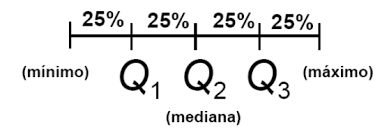

Com isso conseguimos representar muitas informações como por exemplo: 

In [ ]:
np.quantile(base_enem.idade, [.25, .75])

Sabemos que dos usuários na nossa base do enem, 25% deles tem idade menor ou igual a 18 anos. Já, olhando para o quantil de 75% da nossa base sabemos que 75% dos inscritos tem idade menor ou igual a 24 anos. 

E se quiser expandir o pensamento, pense que entre 25% e 75% existe 50%, ou seja, 50% da nossa base está entre 18 e 24 anos. 

Podemos aplicar essa funçãoo também no pandas e no numpy.

## Median (Mediana)

É basicamente o valor que está no quatil 50% do nosso conjunto de dados. 

In [ ]:
np.quantile([0,1,2,3,4,5,6,7,8,9,10], [.5])

5 está no meio extato, onde fica 50% dos registros 

podemos buscar essa informação de outras formas, como por exemplo:

In [ ]:
np.median([0,1,2,3,4,5,6,7,8,9,10])

Ou podemos buscar via pandas: 

In [ ]:
base_enem.idade.median()

## Outros 

Existem uma grande variedades de métricas que podem ser utilizadas na Estatística Descritiva, mas vamos só lista-las, acho que já deu para ver como elas funcionam: 
    
* sum: Faz a Soma de um conjunto de Dados.
* count: Conta quantos registros não nulos há no conjunto.
* unique: Retorna apenas os registros únicos de um conjunto de Dados.
* nunique: Conta quantos registros únicos existem no conjunto.     
* std: Calcula o desvio padrão da base de dados.

<br>

```python
np.sum([0,1,2,3,4,5,6,7,8,9,10])

np.count([0,1,2,3,4,5,6,7,8,9,10])

np.unique([0,1,2,3,4,5,6,7,8,9,10])

np.nunique([0,1,2,3,4,5,6,7,8,9,10])

np.std([0,1,2,3,4,5,6,7,8,9,10])
```

<hr>

# Análise Exploratória

Existe uma forma de resumir todas as informações que estão presentes dentro de um conjunto de dados, é o método `describe()` do pandas.

Com ele, vamos ter as informações de quase todas as colunas: quantidade, média, desvio padrão, mínimo, máximo, e os quantis.

In [ ]:
base_enem.describe()

Aqui conseguimos ter uma mini tabela que apresenta uma descrição dos dados que temos, vamos olhar para a informação da idade por enquanto: 

Temos 5.095.270 registros de idade, uma média de 22.09 e um desvio padrão (variação) de 7.45 anos em torno da média. A menor idade registrada é 1 ano ( alguém tentando enganar o sistema eheheh) e a maior idade registrada é 94 anos.


O método Describe realmente nos ajuda a ter uma clareza dos dados que temos. 

<br>

Vimos que 25% da base, tem menos que 18 anos. Pensando de forma inversa olhando os 25% de cima, vemos que 25% da base tem mais que 24 anos.

E se pensarmos na parcela que está entre os 25% e os 75%, podemos entender que 50% dos inscritos do ENEM 2019 tem entre 18 e 24 anos.

Outra forma de olhar para essa mesma informação é por meio de uma visualização chamada **Boxplot**

<img src='https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png' width=700>

Vamos usar o Boxplot para visualizar os dados de idade:

In [ ]:
sns.boxplot(base_enem.idade);

Vamos melhorar esse gráfico um pouco mais e deixa-lo apresentável:

In [ ]:
sns.boxplot(base_enem.idade, color='tab:blue') # Criando o gráfico de Boxplot para as idades

plt.xlabel('Idades') # Rótulo do Eixo X
plt.title('Boxplot das Idades - [ENEM 2019]');

Conseguimos ver nítidamente a concentração das idades por meio do gráfico acima.

Vamos mudar a forma de visualização agora, para um gráfico de histograma. Um Histograma, faz grupos de dados, como por exemplo abaixo vai estar agrupado de 5 em 5 anos e assim vamos ver quantos inscritos temos em cada grupo.

In [ ]:
base_enem.idade.hist();

> Obs:  No eixo Vertical, temos números como 2.5, isso não quer dizer que tem apenas 2.5 pessoas naquela ponto do gráfico, mas sim que tem 2.5*(10^6) pessoas (2500000), pois estamos usando a notação 1e6 para simplificar.

Vamos adicionar um pouco de estilo a esse gráfico também:

In [ ]:
sns.histplot(base_enem.idade, bins=50) # Bins é quantidade de barras possiveis.

plt.yticks(
    ticks=[0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000],
    labels=['0', '200K', '400K', '600K', '800K', '1M', '1.2M', '1.4M']
) # Valores presentes no eixo y

plt.xticks(range(0, 91, 5)) # Valores presentes no eixo X


plt.ylabel("Quantidade de Inscritos") # Nome do Eixo  Vertical
plt.xlabel("Idades") # Nome do Eixo Horizontal

plt.title("Distribuição das Idades - [ENEM 2019]"); # Titulo do gráfico

Vamos adicionar um complemento, por exemplo uma barra indicando a média das idades: 

In [ ]:
media_idades = base_enem.idade.mean() # Calculando a média das idades 
sns.histplot(base_enem.idade, bins=50) # Bins é quantidade de barras possiveis.

plt.yticks(
    ticks=[0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000],
    labels=['0', '200K', '400K', '600K', '800K', '1M', '1.2M', '1.4M']
) # Valores presentes no eixo y

plt.xticks(range(0, 91, 5)) # Valores presentes no eixo X
plt.axvline(media_idades, c='red', label='Média das idades {}'.format(round(media_idades,0))) #linha horizontal com a média

plt.ylabel("Quantidade de Inscritos") # Nome do Eixo  Vertical
plt.xlabel("Idades") # Nome do Eixo Horizontal

plt.title("Distribuição das Idades - [ENEM 2019]") # Titulo do gráfico
plt.legend()

<hr>

Vamos continuar explorando outros dados. Para isso vamos chamar a função `sample` que vai nos dar uma amostra aleatória dos dados 

In [ ]:
base_enem.sample(10)  # Gera uma amostra com 10 registros aleatórios da nossa tabela 

Vamos explorar outra coluna por agora... que tal a coluna contendo informações sobre sexo ? Será se temos mais homens ou mulheres inscritos para o ENEM de 2019 ? 

Uma função muito útil para isso é o `value_counts()` essa função literalmente conta quantos registros temos para cada valor dentro da coluna.
Vamos ver isso na prática:

In [ ]:
base_enem.sexo.value_counts() # contar

Com um única linha de python foi possível descobrir quantas ocorrências de F (Feminino) e M (Masculino) houve na base de dados. Mas trabalhar com valores soltos não é muito interessante, vamos tentar manipulá-los:

Uma vantagem de se trabalhar com o Numpy/Pandas, é que podemos fazer operações aritméticas com vetores de uma forma bem simples, por exemplo:


In [ ]:
np.array([10, 10])  + 1001 # adição

Na linha de código acima eu somei 1001  à cada elemento do array.

Podemos também fazer operções de multiplicação e divisões dessa mesma forma

In [ ]:
np.array([10, 20])  * 100 # multiplicação

In [ ]:
np.array([10, 20])  / 2 # divisão

Vamos usar essa técnica para calcular quantos porcento dos nossos registros da tabela sexo são M e F:

In [ ]:
(base_enem.sexo.value_counts() *100)/ base_enem.sexo.count() 

Agora temos que 59% da nossa base é Feminina, e 40% é masculina apenas. Talvez isso seja uma consequência de ter um país com mais mulheres do que homens, ou realmente mostra um interesse maior das mulheres em buscar um ensino superior.
Mas nem tudo vamos conseguir explicar apenas com os dados que temos... 

Vamos também mostrar essa informação para ficar um pouco mais intuitiva:

In [ ]:
enem_por_sexo = base_enem.sexo.value_counts() # Contabilizamos os registros por cada sexo.

_, ax = plt.subplots() # Criamos a figura onde exibiremos o Gráfico

patches, texts, autotexts = ax.pie( # configuramos o gráfico de Pizza.
    enem_por_sexo, 
    colors = ['red','blue'], 
    labels=['Feminino', 'Masculino'], 
    autopct='%1.1f%%', 
    startangle=90
)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('white')
    
plt.title('Inscrições por Sexo  [ENEM 2019]');

<hr>

Vamos olhar outra amostra aleatória de dados 

In [ ]:
base_enem.sample(10) 

Na coluna **tipo_ens_med**, tem informações sobre qual o tipo de escola que o inscrito estudou no seu ensino médio. Mas ela não nos trás valores completos, apenas uma informação numérica como descrito abaixo:  
    
* 1 -> Não Respondeu
* 2 -> Pública
* 3 -> Privada
* 4 -> Exterior


Para facilitar nossa análise, vamos aplicar uma função que vai ***mapear*** os valores numérios para textuais como vimos acima:

In [ ]:
mapa_tipo_ensino_medio = {
    1: 'Sem Resposta',
    2: 'Pública',
    3: 'Privada',
    4: 'Exterior'
}

Criamos um dicionário que cada chave é um registro na tabela, e os valores associados às chaves, são o que queremos substituir. Agora é só chamar a função `map` do pandas 

In [ ]:
base_enem['tipo_ens_med'] = base_enem['tipo_ens_med'].map(mapa_tipo_ensino_medio)
base_enem

Agora que temos os valores corrigidos na nossa base, vamos usar a função que aprendemos para contabilizar totais para cada valor único na tabela:

In [ ]:
base_enem.tipo_ens_med.value_counts()*100 / base_enem.tipo_ens_med.count()

Grande parte da nossa base prefiriu não declarar respostas sobre essa pergunta. Vamos visualizar isso também 

In [ ]:
base_enem.tipo_ens_med.value_counts()

Para visualizar isso vamos fazer um pequeno tratamento aos dados:

Vamos criar uma variável que vai armazenar a quantidade de inscrições por tipo de ensino médio. Isso vai facilitar nossa vida para gerar uma visualização.

Para isso vamos usar 2 funções importantíssimas do pandas: `groupby` e `reset_index()`

* A função group by gera uma nova tabela agrupando os dados pela coluna ou colunas passadas no parâmetro `by`  e aplica alguma estatística descritiva para agregar os dados, como por exemplo as funções que vimos: `sum`, `mean`, `count`, `nunique` e etc..

* Já a função `reset_index`, vai apenas corrigir o index (aqueles númerozinhos do lado esquerdo da tabela.

In [ ]:
df_visualizacao = base_enem.groupby(by=['tipo_ens_med']).count()['inscricao'].reset_index()
df_visualizacao

In [ ]:
sns.barplot(df_visualizacao.tipo_ens_med,  df_visualizacao.inscricao, color='tab:blue') # Criando um gráfico de Barras 

plt.yticks(
    ticks=[0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000],
    labels=['0', '500K', '1M', '1.5M', '2M', '2.5M', '3M', '3.5M']
) # Valores presentes no eixo y



plt.xlabel("Tipo de Ensino Médio") # Rótulo do eixo X
plt.ylabel("Quantidade de Inscritos") # Rótulo do eixo Y

plt.title("Respostas por Tipo de Ensino Médio [ENEM 2019]");

<hr>

# Limpando e Explorando os Dados 

Bom, vamos agora para a parte mais interessante da nossa análise, as notas do ENEM, vamos ver uma amostra desses dados. Para isso vamos filtrar apenas as colunas referentes a Notas: 

In [ ]:
base_enem[['nota_ct','nota_ch','nota_lc','nota_mt','nota_redacao']].sample(15) # 15 amostras aleatórias 

Já de Cara, podemos perceber que há ocorrências de valores bem estranhos... esses `NaN`. 
Quando há valores como `NaN` ou `nan`, significa que aquela célula está vazia. **NaN**, é a abreviação para *Not a Number (não é um número)*, também usado quando não há informações à serem representadas.

Um dos passos mais importantes numa análise de dados, é lidar com dados sujos... Isto é, aqueles dados que não tem valores preenchidos, ou são outliers que não deveriam existir e outras anômalias que deixam nossa análise mais complicada. A ideia por tras disso é poder trabalhar apenas com os dados que realmente retratam a situação que vamos observar.

Existem algumas tecnicas para tratar dados faltantes, como por exemplo, substituir os valores nulos pela média ou mediana.
Outro que é muito comum de ser utilizado é excluir os registros que tem dados faltantes. (Geralmente fazemos isso quando temos muitoooos registros e retirar alguns, não mudaria muito nossa análise, como o nosso caso.)

<br>

Como podemos pegar por exemplo apenas os registros que tem notas de Ciências e Tecnologias preenchidos ?

Podemos usar a função ``isna()`` para descobrir se um registro é `NaN` ou não.

In [ ]:
base_enem['nota_ct'].isna()

Veja que ao usar a função `isna()` tivemos uma lista de True/False dizendo se a linha tem elementos `NaN`

Podemos Usar isso para filtrar nossa tabela principal: 

In [ ]:
base_enem[ # conjunto de filtros
    base_enem['nota_ct'].isna()
]

Acabamos de filtrar todos os registros que tem a **nota_ct** como `NaN`. Mas queremos Justamente o Inverso....

Para isso vamos fazer a negação do filtro, vamos inverter o que é True/False 

In [ ]:
~base_enem['nota_ct'].isna()

A negação em listas do Pandas, é por meio do operador `~` e não do `!` como estamos usualmente acostumados 

In [ ]:
base_enem[ # conjunto de filtros
    ~base_enem['nota_ct'].isna()
]

Beleza, agora conseguimos filtrar todos os Resultados que buscavamos. Mas repare bem que filtramos apenas por notas de Ciências Naturais que não estão vazias... Precisamos também filtrar o restante.

Para isso podemos aplicar `and`. Por exemplo, quero registros com nota_ct não nulas **e** nota_lc não nulas.

No pandas, para operar filtros com `and`, usamos o operador `&`

In [ ]:
base_enem[ # conjunto de filtros
    (~base_enem['nota_ct'].isna()) &
    (~base_enem['nota_ch'].isna()) &
    (~base_enem['nota_lc'].isna()) &
    (~base_enem['nota_mt'].isna()) &
    (~base_enem['nota_redacao'].isna())
]

Agora simm!! Temos o resultado que desejavamos. Vamos também aproveitar e filtrar apenas registros que tiveram notas maiores que 0 (que de fato realmente conseguiu fazer pelo menos uma questão).

Vamos armazenar isso em uma nova variável.

In [ ]:
base_enem_notas = base_enem[ # conjunto de filtros
    (~base_enem['nota_ct'].isna()) &
    (~base_enem['nota_ch'].isna()) &
    (~base_enem['nota_lc'].isna()) &
    (~base_enem['nota_mt'].isna()) &
    (~base_enem['nota_redacao'].isna()) &
    (base_enem['nota_ct'] > 0) &
    (base_enem['nota_ch'] > 0) &
    (base_enem['nota_lc'] > 0) &
    (base_enem['nota_mt'] > 0) &
    (base_enem['nota_redacao'] > 0)
]
base_enem_notas

Aqui vale a pena ressaltar que boa parte da nossa base teve registros removidos. Podemos calcular quantos % dos dados foram jogados fora por terem notas sem informação, vamos comparar a quantidade de registro nas nossas 2 tabelas:

In [ ]:
(base_enem_notas.inscricao.count()/ base_enem.inscricao.count()) *100 

Conseguimos ver que a nossa base com as notas limpas tem apenas 70% dos registros da nossa base de dados completa.

Com isso temos mais uma informação Extremamente importante, **30% das inscrições no ENEM 2019 tiveram pelo menos uma das notas nulas.**

O processo de limpar os dados também nos trás informações interessantes, sobre o quanto de coisa *redundante* está acontecendo 

<hr>

# Explorando as informações de Nota 

Vamos ver um overview geral das notas, para termos uma noção dos dados que temos para trabalhar. Para isso começaremos selecionando todos as colunas de notas e chamando a função `describe()`

In [ ]:
base_enem_notas[['nota_ct', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_redacao']].describe()

* Aparentemente a redação tem uma média bem maior que as outras notas.
* Matemática e Linguagens tem uma média e mediana maior do que Ciências naturais e Ciências Humanas.


Vamos aprofundar isso utilizando visualizações, acho que o Boxplot seria o ideal para mostrar tanta informação distinta (várias colunas de notas).

Mas dessa vez vamos usar o boxplot que o Pandas já monta para nós: 

In [ ]:
base_enem_notas[['nota_ct', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_redacao']].boxplot()

Ficou bem parecido com o gráfico que montamos no Seaborn anteriomente.
Vamos deixar esse gráfico um pouco mais bonito e legível

In [ ]:
base_enem_notas[['nota_ct', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_redacao']].boxplot()

plt.xticks(
    ticks=[1,2,3,4, 5], 
    labels=['Ciências da natureza e suas tecnologias', 'Ciências humanas e suas tecnologias', 'linguagens, Códigos e suas tecnologias', 'Matemática e suas Tecnologias', 'Redação'], 
    rotation=75
)

plt.xlabel("Matérias no ENEM")
plt.ylabel("Notas")

plt.title("Boxplot Notas por Matéria [ENEM 2019]");

Aqui vemos que as pessoas há mais chances de Notas altíssimas em Matemática mais do que em outras matérias. Mas em geral, grande parte das notas se encontram entre 400 e 500  

Inicialmente esse gráfico, esse gráfico não significa muita coisa, mas podemos aprofundar ele com mais detalhes.

Podemos olhar essa informação de forma mais *"micro"*, vamos olhar apenas para Matemática e Linguagem.

In [ ]:
sns.histplot(base_enem_notas.nota_lc, bins=100, color='tab:green', alpha=0.6, label="Linguagem, Códigos e suas Tecnologias")
sns.histplot(base_enem_notas.nota_mt, bins=100, color='tab:red', alpha=0.6, label="Matemática e suas Tecnologias")
# sns.histplot(base_enem_notas.nota_ch, bins=100, color='blue', alpha=0.6, label="Ciências Humanas e suas Tecnologias")

plt.xlabel('Notas')
plt.ylabel('Quantidade de Inscritos')

plt.title("Frequência das Notas por Matéria")
plt.legend();

A tendência central e a mediana da Nota em Linguagens é maior do que a de matemática, isso é visível.

Mas por outro lado, há muito mais pessoas tirando notão  em matemática do que em linguagens.

<br>
<br>


Vamos agora dar uma olhada na média geral das notas dos alunos no ENEM. Como não temos uma coluna com a média de todas as notas, vamos criar:
* **nota_media**: vai receber a média entre todas as notas do ENEM.
* **media_questionario**: vai recber a média entre todas as notas do ENEM menos a nota de Redação.

In [ ]:
base_enem_notas['nota_media'] = base_enem_notas[['nota_ct', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_redacao']].mean(axis=1)
base_enem_notas['media_questionario'] = base_enem_notas[['nota_ct', 'nota_ch', 'nota_lc', 'nota_mt']].mean(axis=1)
base_enem_notas

Agora podemos gerar um gráfico para analisarmos a distribuição das notas médias do ENEM:

In [ ]:
sns.histplot(base_enem_notas.nota_media, bins=200, color='tab:blue')
plt.xlabel('Notas')
plt.ylabel('Quantidade de Inscritos')
plt.title("Distribuição das  Médias de Notas [ENEM 2019]");

Temos claramente uma distribuição Normal aqui, em que há uma medida central, a média geral, e que quanto mais longe dessa média, menos pessoas encontraremos.  

Uma coisa assustadora que podemos analisar, imagine por exemplo que gostariamos de ver os competidores do ENEM 2019 para as vagas de **Medicina na USP**  em 2019. 

Nesse período, a nota de corte na USP era de 780 para Medicina, Vamos ver a pequena parcela que poderia participar dessa competição 

In [ ]:
sns.histplot(base_enem_notas.nota_media, bins=200, color='tab:blue')

plt.xlim(300, base_enem_notas.nota_media.max())
plt.axvspan(780, base_enem_notas.nota_media.max(), alpha=0.3, color='tab:red', label="Passaria em Medicina na USP") #cria uma aréa colorida no gráfico

plt.xlabel('Notas')
plt.ylabel('Quantidade de Inscritos')
plt.title("Distribuição das  Médias de Notas [ENEM 2019]")
plt.legend();

In [ ]:
(base_enem_notas[base_enem_notas['nota_media'] > 780].inscricao.count() / base_enem_notas.inscricao.count())*100

In [ ]:
base_enem_notas[base_enem_notas['nota_media'] > 780].inscricao.count()

Apenas 0.07% dos inscritos do ENEM de 2019 seriam capazes de competir para uma vaga em Medicina na USP. 
Isso representa, apenas 2520 inscritos do ENEM. Uma competição completamente difícil.

<hr>


Outra forma de análisar esses mesmos dados são por meio de visualizações como Boxplots, vamos tentar visualizar essa informação a seguir::

In [ ]:
sns.boxplot(base_enem_notas.nota_media)

plt.xlabel('Notas')

plt.title("Boxplot Média das Notas [ENEM 2019]")
plt.legend();

Perceba que pelo boxplot, pessoas com menos de 300 pontos de média e mais que 750 já são visto como outliers, isto é, pessoas fora da curva, da forma boa e ruim.

Além disso conseguimos usar os valores dos quantis para gerar informações complementares: 

In [ ]:
base_enem_notas.nota_media.quantile([.25, .5, .75])

Podemos dizer que 50% dos alunos no ENEM de 2019 tiveram uma nota entre 460 e 580.

Ou também que 75% dos inscritos tiveram uma nota menor que 580.

In [ ]:
base_enem_notas.nota_media.quantile([.90])

90% Dos alunos em 2019, tiveram uma nota média menor que 640.

<hr>

# Cruzando Informações 

Agora que temos dados limpos sobre notas, podemos utilizá-los para fazer algumas análises, correlacionando a nota média obtida com as outras features dentro do Dataset

In [ ]:
sns.histplot(
    base_enem_notas[base_enem_notas.treineiro == 1].nota_media,
    bins=100, 
    color='tab:red', 
    alpha=0.6, 
    label="Treineiro"
)

sns.histplot(
    base_enem_notas[base_enem_notas.treineiro == 0].nota_media,
    bins=100, 
    color='tab:green', 
    alpha=0.6, 
    label="Não Treineiro"
)
# sns.histplot(base_enem_notas.nota_mt, bins=100, color='tab:red', alpha=0.6, label="Matemática e suas Tecnologias")
# sns.histplot(base_enem_notas.nota_ch, bins=100, color='blue', alpha=0.6, label="Ciências Humanas e suas Tecnologias")

plt.xlabel('Notas')
plt.ylabel('Quantidade de Inscritos')

plt.title("Frequência de Treineiros [ENEM de 2019]")
plt.legend();

Uma coisa que podemos extrair desse gráfico, é que as pessoas que vão de fato fazer o enem para valer, é um reflexo do público treineiro, so que em maior quantidade. Visque tem distribuições de notas muito semelhantes.

<hr>

Lá no início do estudo vimos que temos mais mulheres do que homens inscritos para o Enem. Mas será se o público feminino tem uma performance melhor, seja na redação ou no ?

In [ ]:
sns.boxplot(
    data=base_enem_notas,
    y='media_questionario',
    x='sexo',
    color='tab:red', 
)

plt.xlabel("Sexo")
plt.ylabel("Média Das Notas")

plt.title("Boxplot Notas dos cadernos por Sexo [ENEM 2019]");

Aqui vemos que o Sexo masculino tem uma concentração em valores um pouco maiores que os do público feminino

In [ ]:
sns.boxplot(
    data=base_enem_notas,
    y='nota_redacao',
    x='sexo',
    color='tab:red', 
)
plt.xlabel("Sexo")
plt.ylabel("Média Das Notas")

plt.title("Boxplot Nota Readação por Sexo [ENEM 2019]");

Mas se olharmos para a nota das redações, temos um teto um pouco maior para as notas femininas, e uma amplitude concentrada um pouco mais elevada que público masculino.

<hr>

Outra coisa que podemos análisar é a média das notas que cada estado tem: 

Vamos gerar uma nova tabela que vai agrupar a média das notas por cada estado, e vamos renomear as colunas para cada um dos respectivos nomes completos.

Antes vamos aprender uma coisa bem legal, como renomear colunas de uma tabela. Para isso podemos chamar a função `rename(columns={})` em que columns recebe o dicionário de colunas originais e colunas renomeadas, por exemplo:

In [ ]:
base_enem_notas[['nota_lc', 'nota_mt']].rename(columns={
    'nota_lc': 'nota_de_linguas',
    'nota_mt': 'nota_de_matemática',
})

Vamos aplicar no nosso conjunto de dados!

In [ ]:
df_plot = base_enem_notas[['estado', 'nota_ct', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_redacao']].groupby('estado').mean()
df_plot = df_plot.rename(columns={
    'nota_ct': 'Ciências Naturais',
    'nota_ch': 'Ciências Humanas',
    'nota_lc': 'Linguagens e códigos',
    'nota_mt': 'Matemática',
    'nota_redacao': 'Redação',
})
df_plot

Na matemática, exista uma operação que usamos muito comumente quando trabalhamos com matrizes, a `Transposição`. Essa operação tranforma linhas em colunas e colunas em linhas em uma matriz. Por exemplo:


In [ ]:
vetor = np.array([
    [1,2,3,4,5],
    [6,7,8,9,10],
    [11,12,13,14,15],
    [16,17,18,19,20],
    [21,22,23,24,25],
])
vetor

Agora vamos pegar essa matriz de dados e *transpor* os valores, usando a propriedade `T`:

In [ ]:
vetor.T

Transposição de matriz: 

<br>
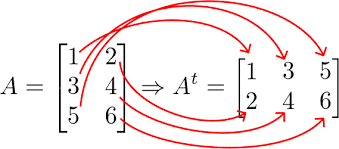

Vamos fazer a mesma coisa com nossa tabela de estados e notas:

In [ ]:
df_plot.T

Agora vamos visualizar a tabela usando cores. Cores mais escuras são valores mais altos e cores mais claras são as notas menores.

In [ ]:
fig, ax = plt.subplots(figsize=(30,10)) # Configurando o layout de exibição
sns.heatmap(df_plot.T ,annot=True, fmt=".0f", square=True, linewidths=.5, ax=ax, cmap='rocket_r') # Criando o Gráfico de heatmap

plt.xlabel("Estados", labelpad=20)
plt.tight_layout() # Ajusta o Gráfico 

<hr>

## Correlação entre as Notas 

Você pode está se perguntando, será que pessoas com notas altas nos cadernos de CT, LT, MT e CH também tem notas altas na redação ?

Bom primeiro vamos testar uma nova visualização, em que mostra onde as distribuições das notas de questionário e a distribuição das notas de redação se encontram

Usaremos um gráfico em forma de hexagonos, onde a intensidade da cor, mostra concentração em ambos as métricas.

In [ ]:
plt.rcParams['figure.figsize'] = (25, 25)
sns.jointplot(data=base_enem_notas, x="media_questionario", y="nota_redacao",kind="hex", height=15, marginal_kws=dict(bins=100))

plt.xlabel("Média das Notas CT, LC, MT e CH", labelpad=20)
plt.ylabel("Nota Redação")

plt.title("Notas Redação VS Outras Notas - [ENEM 2019]");

Mas realmente isso não é correlação....

Ao invés disso, e se existisse um método que mostrasse para nós a seguinte informação por exemplo: *"Em geral quem tira nota alta em Matemática tira nota alta em Redação também"* ou mesmo ao contrário como  *"Em geral que tira nota baixa em Redação Tira nota alta em matemática"*

SIMM, esse método existe, existe uma função que testa correlações lineares entre variáveis, isto é, verifica se duas variáveis cresce proporcionalmente ou se 2 variáveis crescem inversamente proporcional.

### Coeficiente de Pearson

A técnica estatística mais simples para testar correlação linear entre 2 variáveis é chamada de *[Coeficiente de Pearson](https://towardsdatascience.com/pearson-coefficient-of-correlation-explained-369991d93404)*. Com ela  podemos responder a seguinte pergunta: ***Qual tipo de correlação existe entre essas variáveis ?***

Vamos explicar os tipos de Correlação de Pearson: 
* **Perfeita**: Uma correlação perfeita, quando o valor do coeficiente é   ± 1. E quando 2 variáveis crescem juntas igualmente (se positivo),  ou uma cresce e a outra decresce juntas (se negativo)
* **Forte**: Se o coeficiente estiver entre  ± 0.50 e ± 1, dizemos que temos uma correlação forte.
* **Moderada**: Se o coeficiente estiver entre  ± 0.30 e ± 0.49,, dizemos que temos uma correlação média ou moderada.
* **Baixa**: Se os valores  estiverem entre 0  e ±0.29 dizemos que acontece uma correlação baixa ou fraca. 


Agora também tem uma diferença entre correlação Positiva e Negativa: 
* **Negativa**: Se a correlação for negativa, quer dizer que enquanto uma variável cresce a outra decresce.
* **Positiva**: Já no caso da correlação ser positiva, enquanto uma variável cresce a outra decresce.


Para calcular o Coeficiente de Pearson é bem simples, é só chamar a função `corr()` dentro do pandas. 

In [ ]:
df_corr = base_enem_notas[['nota_ct', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_redacao']].rename(columns={
    'nota_ct': 'Nota Ciências Naturais', 
    'nota_ch': 'Nota Ciências Humanas', 
    'nota_lc': 'Nota Linguagens', 
    'nota_mt': 'Nota Matemática',
    'nota_redacao': 'Nota Redação'
})
df_corr

In [ ]:
df_corr = df_corr.corr()
df_corr

Já conseguimos ver que existem algumas correlações bem interessantes, mas não há nada negativo. 

Vamos visualizar isso suando o Heatmap (Tabela colorida)

In [ ]:
fig, ax = plt.subplots(figsize=(12,9)) # Configurando o layout de exibição
sns.heatmap(df_corr, annot=True, square=True, linewidths=.5, cmap='rocket_r') # Criando o Gráfico de heatmap

# plt.xlabel("Estados", labelpad=20)
plt.tight_layout() # Ajusta o Gráfico 

Veja que não temos muitas correlações altas com a variável **Nota Redação**.

Por outro lado, temos uma correlação **muito forte**, entre **Nota Linguagens** e **Nota Ciências Humanas**

Com isso conseguimos dizer  algo como o seguinte: 
    
***Pessoas com uma nota alta em linguagens  tendem a ter uma nota alta também  em ciências naturais.***

Mas em geral como todas as correlações são fortes, podemos entender que geralemnte, pessoas que tiram notas altas em uma matéria específica tende a ter uma nota alta nas outras matérias também.

<hr>

## Próximos Passos.

Sugiro que você agora dê continuidade ao estudo, explorando as técnicas que já vimos e gerando mais visualizações e testando as configurações de cada configuração.

## Isso é tudo por agora pessoal! 